In [171]:
# importing modules
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
from scipy.stats import linregress
from Fred_Api import Api_Key

# Covid Hospitalization Data

In [172]:
# reading covid hospitaliztions csv file into DataFrame
covid_hospitalizations = pd.read_csv("3_col_Monthly_COVID_Hospitaliztions.csv")
covid_hospitalizations

,State,Date,Monthly COVID Rate
0,California,2020-03-01,8.6
1,California,2020-04-01,13.4
2,California,2020-05-01,10.3
3,California,2020-06-01,13.9
4,California,2020-07-01,31.8
...,...,...,...
624,Utah,2023-08-01,7.3
625,Utah,2023-09-01,10.7
626,Utah,2023-10-01,10.7
627,Utah,2023-11-01,17.0


In [173]:
# filtering by state data
california_data = covid_hospitalizations[covid_hospitalizations["State"] == "California"]
colorado_data = covid_hospitalizations[covid_hospitalizations["State"] == "Colorado"]
connecticut_data = covid_hospitalizations[covid_hospitalizations["State"] == "Connecticut"]
georgia_data = covid_hospitalizations[covid_hospitalizations["State"] == "Georgia"]
iowa_data = covid_hospitalizations[covid_hospitalizations["State"] == "Iowa"]
maryland_data = covid_hospitalizations[covid_hospitalizations["State"] == "Maryland"]
michigan_data = covid_hospitalizations[covid_hospitalizations["State"] == "Michigan"]
minnesota_data = covid_hospitalizations[covid_hospitalizations["State"] == "Minnesota"]
new_mexico_data = covid_hospitalizations[covid_hospitalizations["State"] == "New Mexico"]
new_york_data = covid_hospitalizations[covid_hospitalizations["State"] == "New York"]
ohio_data = covid_hospitalizations[covid_hospitalizations["State"] == "Ohio"]
oregon_data = covid_hospitalizations[covid_hospitalizations["State"] == "Oregon"]
tennessee_data = covid_hospitalizations[covid_hospitalizations["State"] == "Tennessee"]
utah_data = covid_hospitalizations[covid_hospitalizations["State"] == "Utah"]

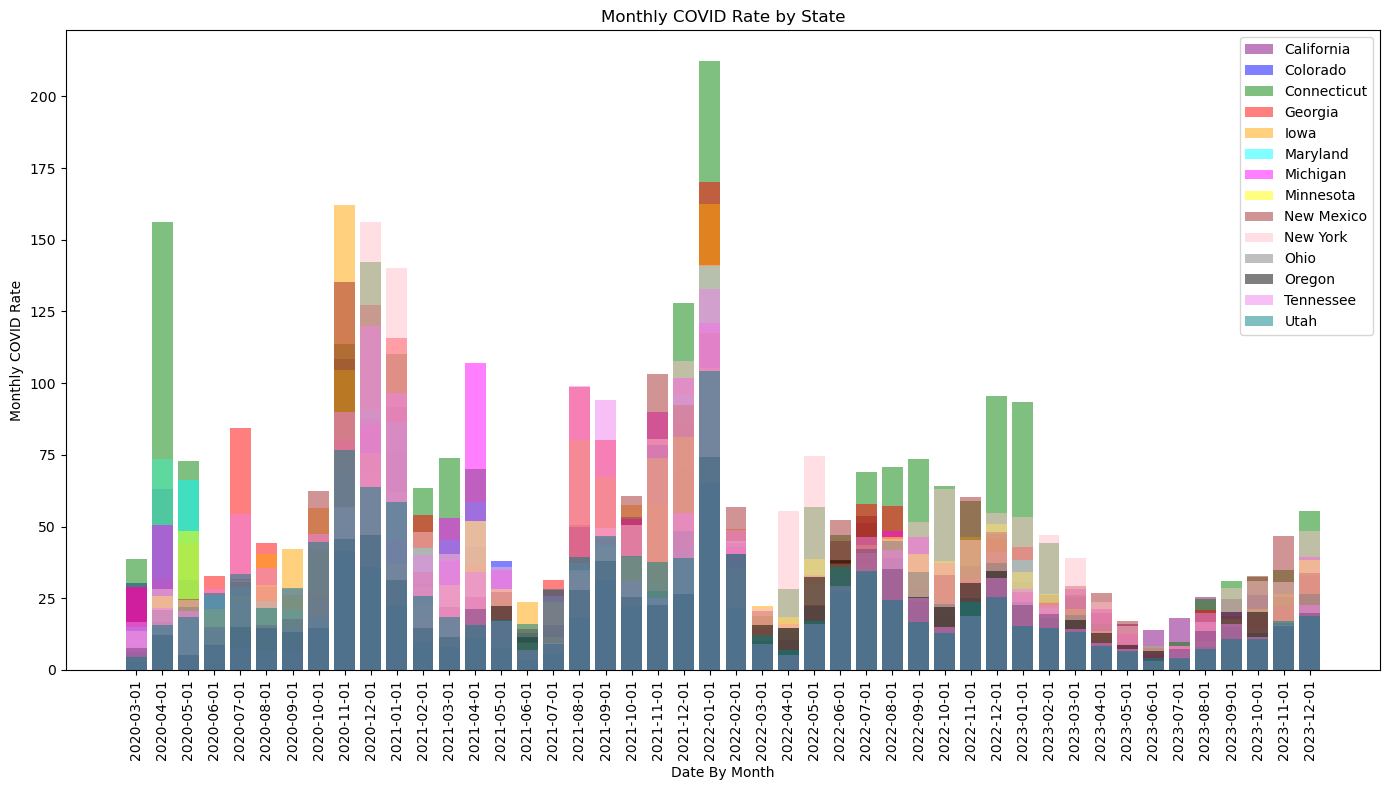

In [174]:
# Combine all state data into a single DataFrame
dataframes = [
    california_data.assign(State="California"),
    colorado_data.assign(State="Colorado"),
    connecticut_data.assign(State="Connecticut"),
    georgia_data.assign(State="Georgia"),
    iowa_data.assign(State="Iowa"),
    maryland_data.assign(State="Maryland"),
    michigan_data.assign(State="Michigan"),
    minnesota_data.assign(State="Minnesota"),
    new_mexico_data.assign(State="New Mexico"),
    new_york_data.assign(State="New York"),
    ohio_data.assign(State="Ohio"),
    oregon_data.assign(State="Oregon"),
    tennessee_data.assign(State="Tennessee"),
    utah_data.assign(State="Utah")
]

combined_data = pd.concat(dataframes)

# Plotting
plt.figure(figsize=(14, 8))
colors = {
    "California": "purple",
    "Colorado": "blue",
    "Connecticut": "green",
    "Georgia": "red",
    "Iowa": "orange",
    "Maryland": "cyan",
    "Michigan": "magenta",
    "Minnesota": "yellow",
    "New Mexico": "brown",
    "New York": "pink",
    "Ohio": "gray",
    "Oregon": "black",
    "Tennessee": "violet",
    "Utah": "teal"
}

for state, color in colors.items():
    state_data = combined_data[combined_data["State"] == state]
    plt.bar(state_data["Date"], state_data["Monthly COVID Rate"], color=color, alpha=0.5, label=state)

plt.title("Monthly COVID Rate by State")
plt.xlabel("Date By Month")
plt.ylabel("Monthly COVID Rate")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig("output_figures/Monthly COVID Rate by State.png")
plt.show()

In [175]:
# calculating average hospitalizations per state
avg_hospitalizations_per_state = covid_hospitalizations.groupby('State')['Monthly COVID Rate'].mean().reset_index()

# renaming column
avg_hospitalizations_per_state.columns = ["State", "Monthly Covid Rate (by hundreds of thousands)"]
avg_hospitalizations_per_state

,State,Monthly Covid Rate (by hundreds of thousands)
0,California,27.797826
1,Colorado,31.267391
2,Connecticut,53.139130
3,Georgia,38.639130
4,Iowa,50.088889
5,Maryland,33.806522
6,Michigan,35.263043
7,Minnesota,34.941304
8,New Mexico,40.228261
9,New York,43.630435


# State Unemployment Rate Data

In [176]:
# reading state unemployment rate csv file into DataFrame
state_unemployment_rate = pd.read_csv("State_Unemployment_Rate.csv")
state_unemployment_rate

,State,Date,Unemployment Percentage
0,California,2015-01-01,6.8
1,California,2015-02-01,6.7
2,California,2015-03-01,6.6
3,California,2015-04-01,6.5
4,California,2015-05-01,6.4
...,...,...,...
1591,Utah,2024-02-01,2.8
1592,Utah,2024-03-01,2.8
1593,Utah,2024-04-01,2.8
1594,Utah,2024-05-01,2.9


In [177]:
# filtering by state data
california_data_ur = state_unemployment_rate[state_unemployment_rate["State"] == "California"]
colorado_data_ur = state_unemployment_rate[state_unemployment_rate["State"] == "Colorado"]
connecticut_data_ur = state_unemployment_rate[state_unemployment_rate["State"] == "Connecticut"]
georgia_data_ur = state_unemployment_rate[state_unemployment_rate["State"] == "Georgia"]
iowa_data_ur = state_unemployment_rate[state_unemployment_rate["State"] == "Iowa"]
maryland_data_ur = state_unemployment_rate[state_unemployment_rate["State"] == "Maryland"]
michigan_data_ur = state_unemployment_rate[state_unemployment_rate["State"] == "Michigan"]
minnesota_data_ur = state_unemployment_rate[state_unemployment_rate["State"] == "Minnesota"]
new_mexico_data_ur = state_unemployment_rate[state_unemployment_rate["State"] == "New Mexico"]
new_york_data_ur = state_unemployment_rate[state_unemployment_rate["State"] == "New York"]
ohio_data_ur = state_unemployment_rate[state_unemployment_rate["State"] == "Ohio"]
oregon_data_ur = state_unemployment_rate[state_unemployment_rate["State"] == "Oregon"]
tennessee_data_ur = state_unemployment_rate[state_unemployment_rate["State"] == "Tennessee"]
utah_data_ur = state_unemployment_rate[state_unemployment_rate["State"] == "Utah"]

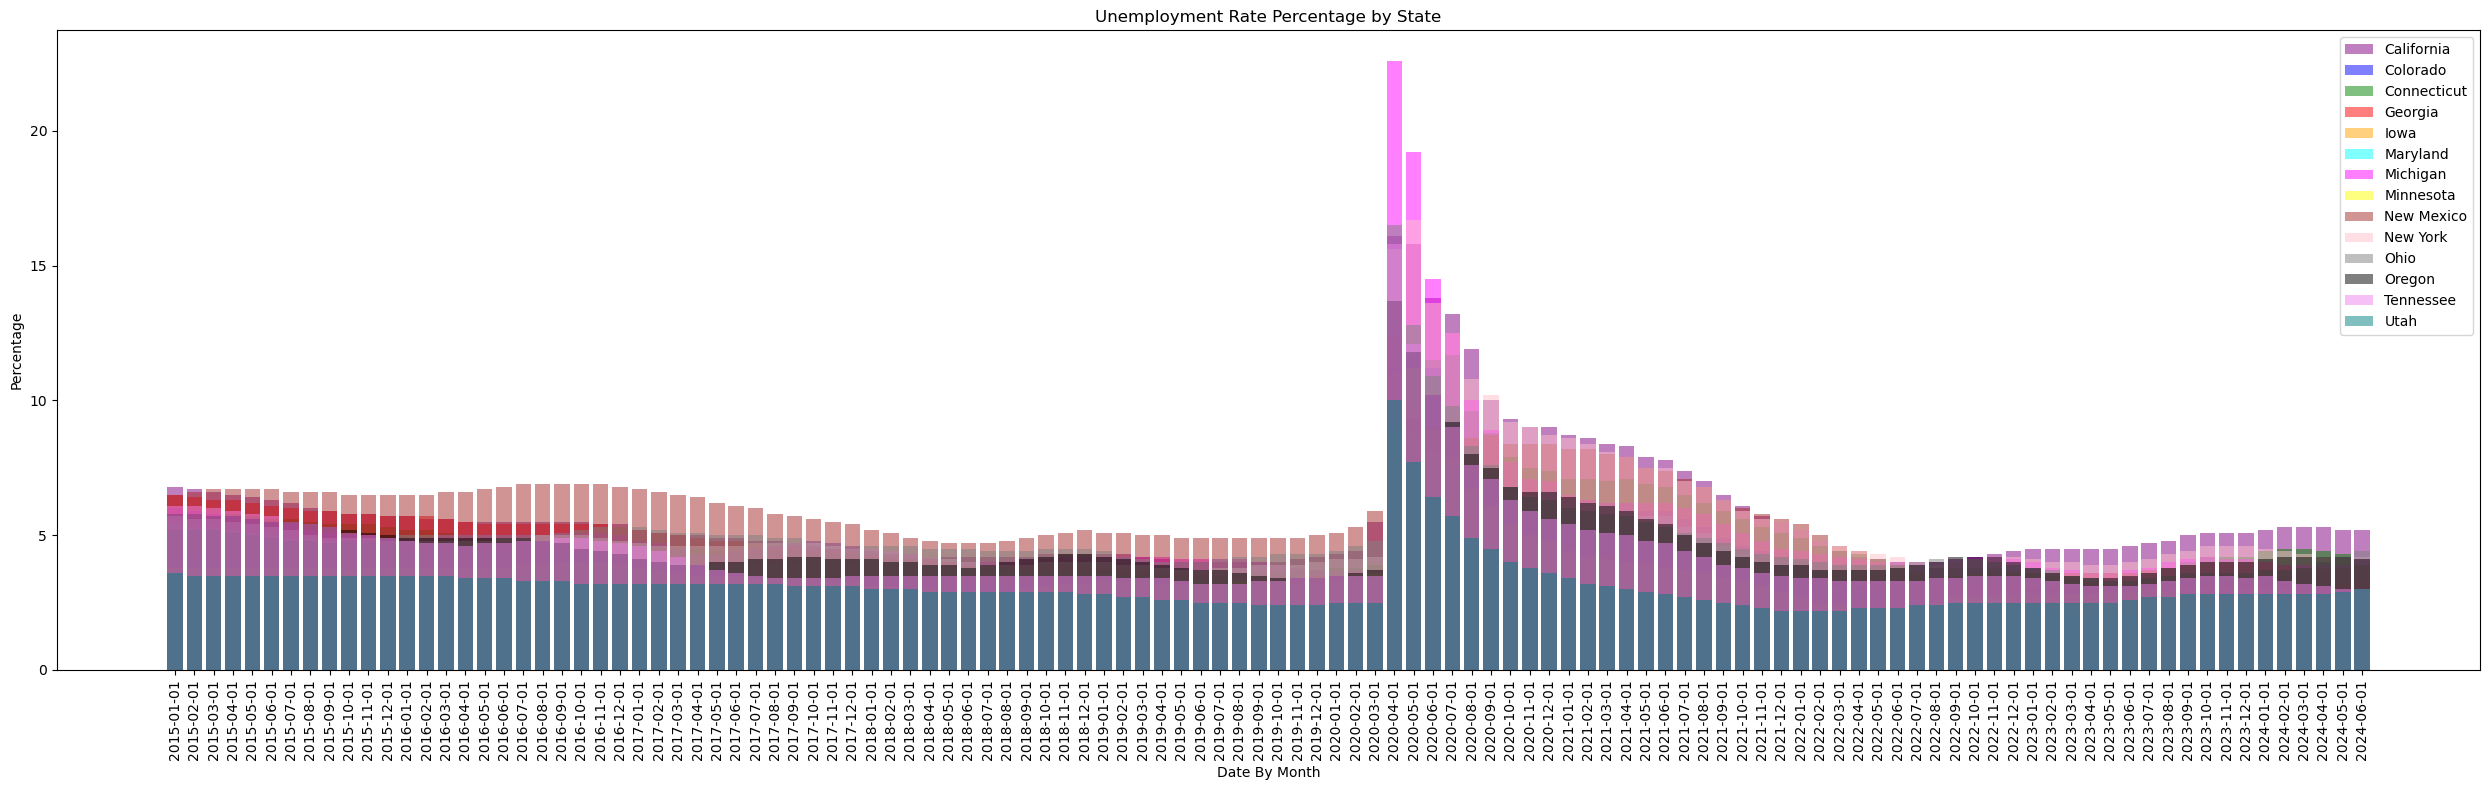

In [178]:
# Combine all state data into a single DataFrame
dataframes_ur = [
    california_data_ur.assign(State="California"),
    colorado_data_ur.assign(State="Colorado"),
    connecticut_data_ur.assign(State="Connecticut"),
    georgia_data_ur.assign(State="Georgia"),
    iowa_data_ur.assign(State="Iowa"),
    maryland_data_ur.assign(State="Maryland"),
    michigan_data_ur.assign(State="Michigan"),
    minnesota_data_ur.assign(State="Minnesota"),
    new_mexico_data_ur.assign(State="New Mexico"),
    new_york_data_ur.assign(State="New York"),
    ohio_data_ur.assign(State="Ohio"),
    oregon_data_ur.assign(State="Oregon"),
    tennessee_data_ur.assign(State="Tennessee"),
    utah_data_ur.assign(State="Utah")
]

combined_data_ur = pd.concat(dataframes_ur)

# Plotting
plt.figure(figsize=(25, 8))
colors = {
    "California": "purple",
    "Colorado": "blue",
    "Connecticut": "green",
    "Georgia": "red",
    "Iowa": "orange",
    "Maryland": "cyan",
    "Michigan": "magenta",
    "Minnesota": "yellow",
    "New Mexico": "brown",
    "New York": "pink",
    "Ohio": "gray",
    "Oregon": "black",
    "Tennessee": "violet",
    "Utah": "teal"
}

for state, color in colors.items():
    state_data_ur = combined_data_ur[combined_data_ur["State"] == state]
    plt.bar(state_data_ur["Date"], state_data_ur["Unemployment Percentage"], color=color, alpha=0.5, label=state)

plt.title("Unemployment Rate Percentage by State")
plt.xlabel("Date By Month")
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig("output_figures/Unemployment Rate Percentage by State.png")
plt.show()

In [179]:
# calculating average unemployment rate per state
avg_state_unemployment_rate = state_unemployment_rate.groupby('State')['Unemployment Percentage'].mean().reset_index()

# renaming column
avg_state_unemployment_rate.columns = ["State", "Monthly Unemployment Rate (by Percentage)"]

# CPI Data

In [180]:
# reading state unemployment rate csv file into DataFrame
cpi_data = pd.read_csv("CPI_Data.csv")
cpi_data.head()

,Date by Month,CPI Median
0,2015-01-01,1.947530
1,2015-02-01,1.954495
2,2015-03-01,2.433336
3,2015-04-01,2.962651
4,2015-05-01,2.501291


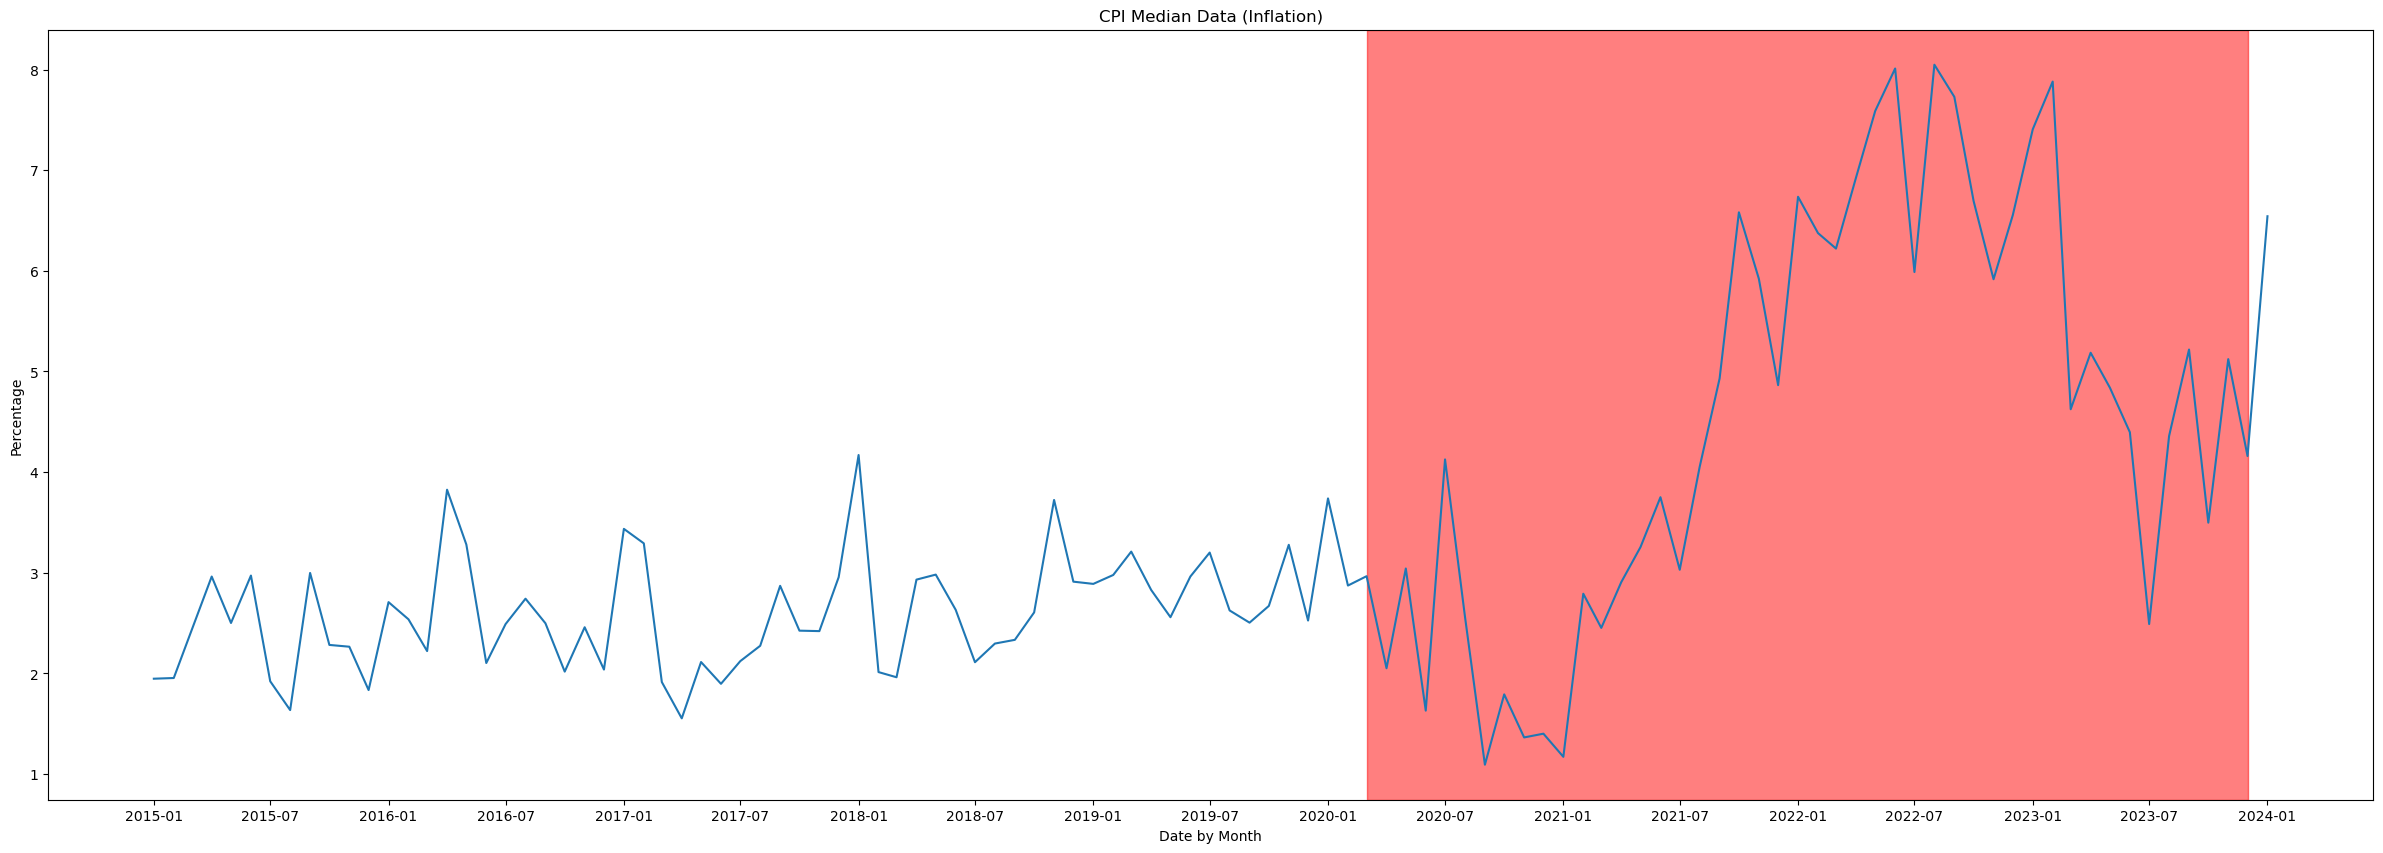

In [181]:
# converting months to datetime
cpi_data['Date by Month'] = pd.to_datetime(cpi_data['Date by Month'])

# plotting
fig,ax=plt.subplots(figsize=(30, 10))
ax.plot(cpi_data['Date by Month'], cpi_data['CPI Median'])
plt.xlabel('Date by Month')
ax.set_xticks(cpi_data['Date by Month'])
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.axvspan(*mdates.datestr2num(['2020/03/01', '2023/12/01']), color='red', alpha=0.5)
plt.ylabel('Percentage')
plt.title('CPI Median Data (Inflation)')
plt.savefig("output_figures/CPI Median Data (Inflation).png")
plt.show()

# Merged Data

In [182]:
# merging average hospitalizations per state and state unemployment rate csv files into new DataFrame
covid_rate_unemployment_rate = avg_hospitalizations_per_state.merge(avg_state_unemployment_rate, on=["State"])
covid_rate_unemployment_rate

,State,Monthly Covid Rate (by hundreds of thousands),Monthly Unemployment Rate (by Percentage)
0,California,27.797826,5.693860
1,Colorado,31.267391,3.737719
2,Connecticut,53.139130,4.918421
3,Georgia,38.639130,4.444737
4,Iowa,50.088889,3.349123
5,Maryland,33.806522,4.055263
6,Michigan,35.263043,5.161404
7,Minnesota,34.941304,3.596491
8,New Mexico,40.228261,5.685088
9,New York,43.630435,5.301754


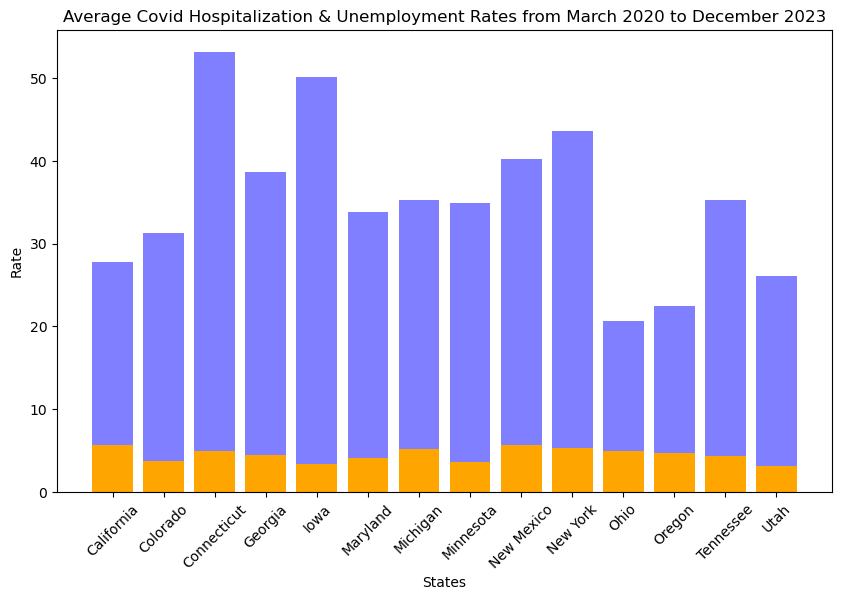

In [183]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

plt.bar(covid_rate_unemployment_rate["State"], covid_rate_unemployment_rate["Monthly Covid Rate (by hundreds of thousands)"], color="blue", alpha=0.5)
plt.bar(covid_rate_unemployment_rate["State"], covid_rate_unemployment_rate["Monthly Unemployment Rate (by Percentage)"], color="orange")

plt.title("Average Covid Hospitalization & Unemployment Rates from March 2020 to December 2023")
plt.xlabel("States")
plt.ylabel("Rate")

plt.savefig("output_figures/Average Covid Hospitalization & Unemployment Rates from March 2020 to December 2023.png")
plt.show()